In [1]:
import pandas as pd

import io
import os
import glob
import sys

# #get micronetworks package
sys.path.append(r'/home/ubuntu/mbb_2023/micronetworks')
import micronetworks
from micronetworks.networkstats import *

# from micronetworks.networkstats import *

sys.path.append(r'/home/ubuntu/mbb_2023/microstat')
import microstat
from microstat.util import *
from microstat.microstats import *
from microstat.plots import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



print(sys.path)


['/home/ubuntu/mbb_2023', '/home/ubuntu/anaconda3/lib/python39.zip', '/home/ubuntu/anaconda3/lib/python3.9', '/home/ubuntu/anaconda3/lib/python3.9/lib-dynload', '', '/home/ubuntu/anaconda3/lib/python3.9/site-packages', '/home/ubuntu/anaconda3/lib/python3.9/site-packages/community-1.0.0b1-py3.9.egg', '/home/ubuntu/anaconda3/lib/python3.9/site-packages/lockfile-0.12.2-py3.9.egg', '/home/ubuntu/anaconda3/lib/python3.9/site-packages/pytz-2023.3.post1-py3.9.egg', '/home/ubuntu/anaconda3/lib/python3.9/site-packages/urllib3-1.26.18-py3.9.egg', '/home/ubuntu/anaconda3/lib/python3.9/site-packages/click-8.1.7-py3.9.egg', '/home/ubuntu/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg', '/home/ubuntu/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/home/ubuntu/.ipython', '/home/ubuntu/mbb_2023/micronetworks', '/home/ubuntu/mbb_2023/microstat']


In [2]:
metadata = pd.read_csv('061223_taxa/annotated_metadata_061323.tsv', sep='\t')
gc_clusters = pd.read_csv('/home/ubuntu/mbb_2023/functional_analysis_gene_cluster/mbb_gene_clusters_12152023.txt', sep='\t')

sample_list = list(metadata['sample_id'])
print(len(sample_list))
#subset to only include sample that are in the metadata file 
gc_clusters_meta = gc_clusters[gc_clusters['sample_name'].isin(sample_list)]
print(gc_clusters_meta['sample_name'].nunique())
gc_clusters_meta_pivot = gc_clusters_meta.pivot(index='sample_name', values='expected_readcount', columns = 'Gene_cluster').fillna(0)


412
412


In [3]:
dmm_taxa = pd.read_csv('metadata_dmm_01302024.tsv', sep='\t')


In [4]:
features = pd.read_csv('important_features_logistic_regression_dmm_01172024.txt', sep='\t')

In [18]:
final_df.head()

,Community_cluster,Gene_cluster
0,CC_1,GC_703845
1,CC_1,GC_353989
2,CC_1,GC_703831
3,CC_1,GC_703859
4,CC_1,GC_1750


In [16]:

community_cluster_dictionary = dict(zip(final_df.Gene_cluster, final_df.Community_cluster))


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib as mpl
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

def clustermap1a(x_a, y_a, df_corre):
    ## Input
    ## df_corre = correlation matrix for all the features
    ## x_a = list of features on x-axis
    ## y_a = list of features on y-axis
    df_for_clust = df_corre.loc[y_a,x_a]
    #metricc = 'euclidean'
    methodd = 'ward'

    row_corr = df_corre.loc[y_a,y_a]
    #row_corr = df_corre.loc[y_a,y_a].abs()
    row_dis_mat = 1 - row_corr
    row_dis_vec = squareform(row_dis_mat)
    row_linkagee = linkage(y=row_dis_vec, method = methodd)

    column_corr = df_corre.loc[x_a,x_a]
    #column_corr = df_corre.loc[x_a,x_a].abs()
    column_dis_mat = 1 - column_corr
    column_dis_vec = squareform(column_dis_mat)
    column_linkagee = linkage(y=column_dis_vec, method = methodd)

    # Create a custom colormap for the heatmap values
    my_cmap=sns.diverging_palette(240, #Anchor hues for negative extents of the map. float in [0, 359]
                                  10, #Anchor hues for positive extents of the map. float in [0, 359]
                                  s = 75, # Anchor saturation for both extents of the map.float in [0, 100],
                                  l = 50, # Anchor lightness for both extents of the map: float in [0, 100],
                                  sep = 1, # Size of the intermediate region.
                                  center = 'light', # Whether the center of the palette is light or dark
                                  as_cmap = True # If True, return a matplotlib.colors.Colormap
                                  )

    pl_1=sns.clustermap(df_for_clust,
                        cmap=my_cmap, 
                        center=0,
                        row_linkage = row_linkagee,
                        col_linkage = column_linkagee,
                        figsize=(23, 23),
                        row_cluster=True,
                        col_cluster=True,
                        dendrogram_ratio=(.1, .2),
                        cbar_pos=(0, 0.2, 0.03, 0.4),
                        xticklabels = True,
                        yticklabels = True)
    
    return pl_1



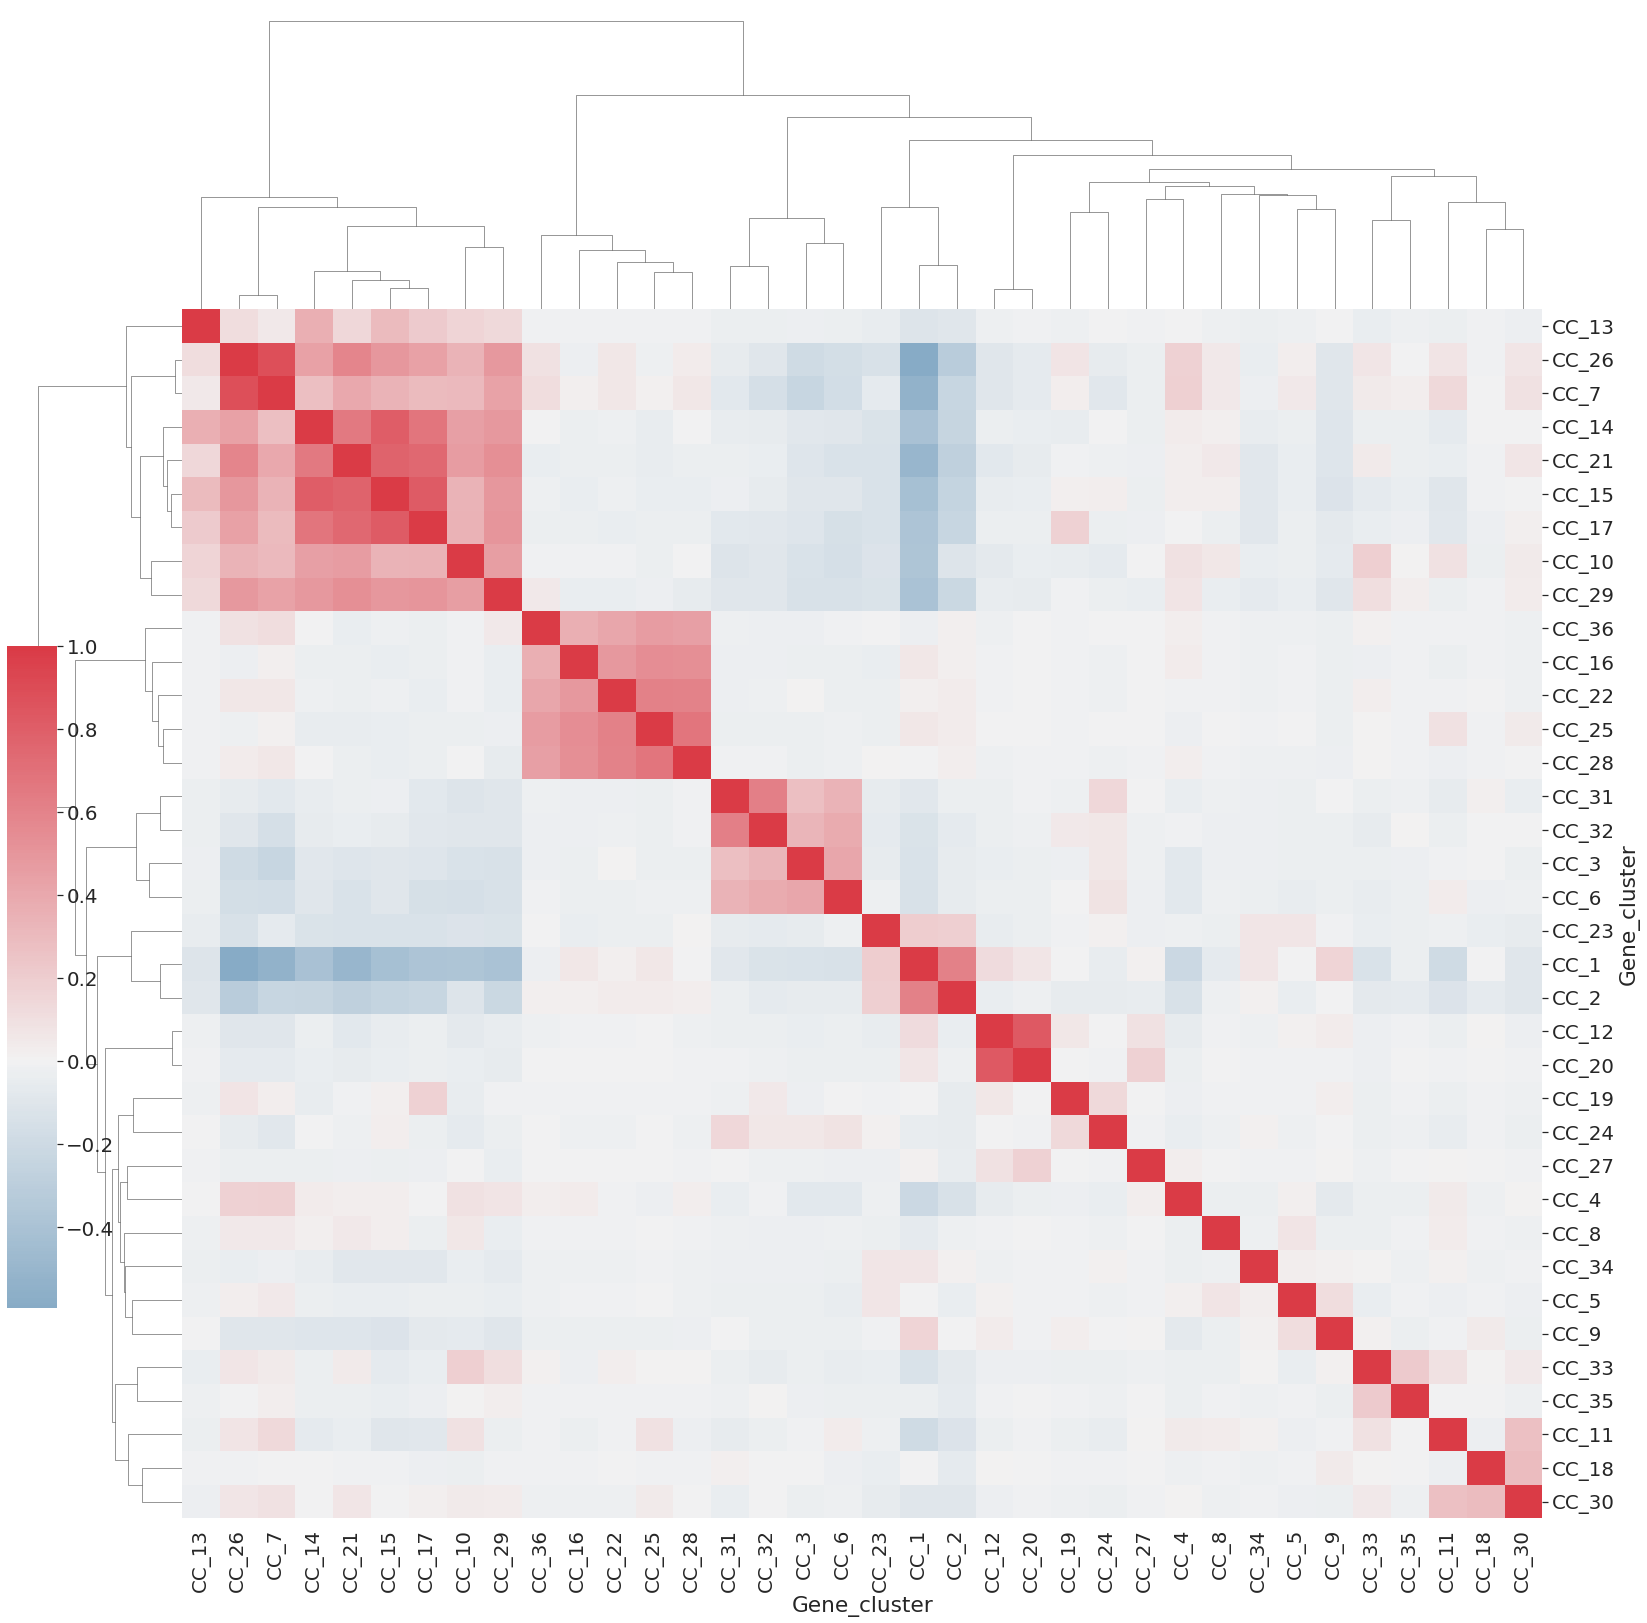

In [22]:

gc_clusters_meta_pivot_ra_clust3v2 = relativeabun(gc_clusters_meta_pivot)
gc_clusters_meta_pivot_ra_clust3v2 = gc_clusters_meta_pivot_ra_clust3v2.rename(columns = community_cluster_dictionary).groupby(lambda x: x, axis =1).sum()
gc_clusters_meta_pivot_ra_clust3v2 = (gc_clusters_meta_pivot_ra_clust3v2)
gc_clusters_meta_pivot_ra_clust3v2


# Assuming df is your DataFrame
columns_to_keep = [col for col in gc_clusters_meta_pivot_ra_clust3v2.columns if col.startswith('CC_')]
gc_clusters_meta_pivot_ra_clust3v2 = gc_clusters_meta_pivot_ra_clust3v2[columns_to_keep]


sns.set(font_scale=1.8)
clustermap1a(gc_clusters_meta_pivot_ra_clust3v2.columns,
             gc_clusters_meta_pivot_ra_clust3v2.columns,
             gc_clusters_meta_pivot_ra_clust3v2.corr())